<a href="https://colab.research.google.com/github/simranvanjani/Personal-projects/blob/main/Image_Classification_using_Convolutional_Neural_Network_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification using Convolutional Neural Network (CNN)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
from keras.datasets import cifar10

import matplotlib.pyplot as plt
plt.style.use('dark_background')


**Load the dataset**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

#Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and 
#each value in the channel can range from 0 to 255. 
#Hence to normalize in 0-->1 range, we need to divide it by 255

train_images, test_images = train_images / 255.0, test_images / 255.0
 

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
train_images.shape[0]


50000

In [ ]:
test_images.shape[0]

10000

In [ ]:
test_labels[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [ ]:
train_labels = train_labels.reshape(-1,)
test_labels = test_labels.reshape(-1,)
test_labels[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

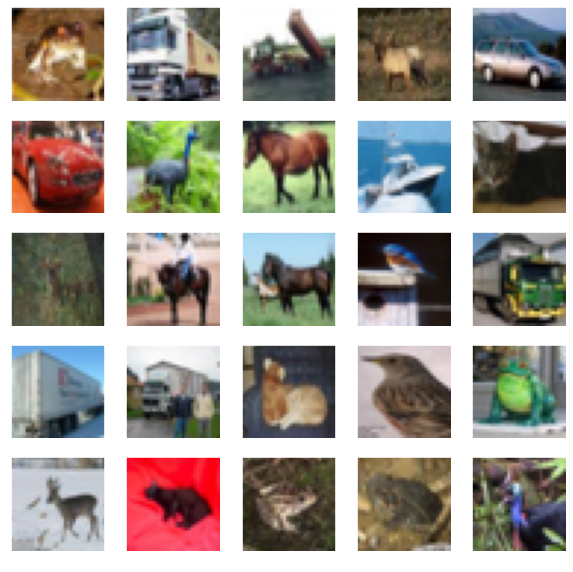

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    y[index]
    plt.xlabel(class_names[y[index]])

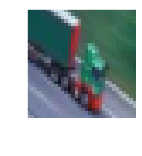

In [ ]:
plot_sample(train_images, train_labels, 50)

In [ ]:
   train_labels[50]

9

# **Build simple artificial neural network for image classification**

In [ ]:
ann = models.Sequential()
ann.add(layers.Flatten(input_shape=(32,32,3))),
ann.add(layers.Dense(3000, activation='relu')),
ann.add(layers.Dense(1000, activation='relu')),
ann.add(layers.Dense(10, activation='softmax'))    
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 98s 62ms/step - loss: 1.8114 - accuracy: 0.3549
Epoch 2/5
1563/1563 [==============================] - 93s 59ms/step - loss: 1.6233 - accuracy: 0.4253
Epoch 3/5
1563/1563 [==============================] - 93s 60ms/step - loss: 1.5412 - accuracy: 0.4572
Epoch 4/5
1563/1563 [==============================] - 93s 60ms/step - loss: 1.4823 - accuracy: 0.4777
Epoch 5/5
1563/1563 [==============================] - 92s 59ms/step - loss: 1.4339 - accuracy: 0.4944


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
pred_labels = ann.predict(test_images)
y_pred_classes = [np.argmax(element) for element in pred_labels]

[[451  23  52  35  42   8  51  24 258  56]
 [ 28 549  11  33  17  13  39  21 108 181]
 [ 68  21 295 116 145  39 218  41  41  16]
 [ 25  12  62 377  50  91 257  39  33  54]
 [ 34  11 123  70 394  20 233  57  42  16]
 [ 21   9  77 247  75 262 192  54  37  26]
 [  2   7  36  66  78  17 748  12  21  13]
 [ 32  18  47  83  97  42  88 500  27  66]
 [ 46  42  13  35  23  15  25  12 731  58]
 [ 25 131   9  49  16  14  42  34 107 573]]


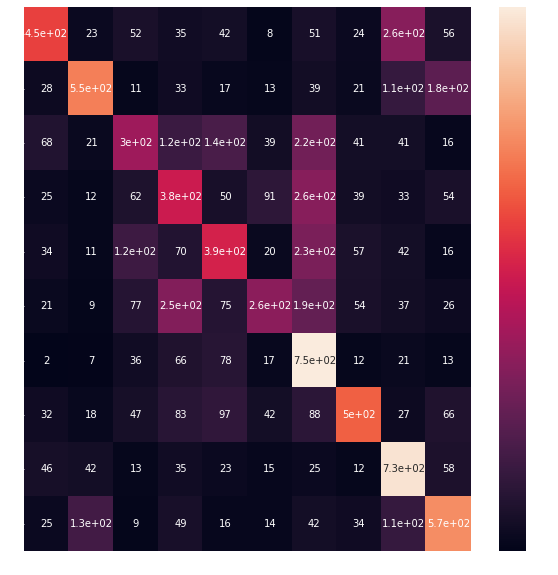

In [ ]:
cf_matrix = confusion_matrix(test_labels, y_pred_classes)
print(cf_matrix)
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cf_matrix, annot=True)

In [ ]:
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape =(32,32,3)))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(512,activation = 'relu'))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.Dense(64,activation = 'relu'))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.Dense(10,activation = 'softmax'))
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                  

In [ ]:
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn_model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 92s 58ms/step - loss: 1.6141 - accuracy: 0.4066
Epoch 2/10
1563/1563 [==============================] - 91s 58ms/step - loss: 1.2424 - accuracy: 0.5611
Epoch 3/10
1563/1563 [==============================] - 90s 58ms/step - loss: 1.0856 - accuracy: 0.6184
Epoch 4/10
1563/1563 [==============================] - 90s 58ms/step - loss: 0.9864 - accuracy: 0.6580
Epoch 5/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.9020 - accuracy: 0.6886
Epoch 6/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.8511 - accuracy: 0.7066
Epoch 7/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.8102 - accuracy: 0.7253
Epoch 8/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.7704 - accuracy: 0.7330
Epoch 9/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.7311 - accuracy: 0.7451
Epoch 10/10
1563/1563 [==============================] - 92s 59m

In [ ]:
cnn_model.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 13ms/step - loss: 0.8022 - accuracy: 0.7244


[0.8022387027740479, 0.724399983882904]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
pred_labels = cnn_model.predict(test_images)
y_pred_classes = [np.argmax(element) for element in pred_labels]

[[723   7  29  26  38   4  18   1 112  42]
 [ 21 792   2  14   9   4  22   1  32 103]
 [ 76   2 529 103 144  57  57  12  13   7]
 [  9  10  33 603  81 143  80  11  18  12]
 [ 13   1  26  62 811  26  30  19  10   2]
 [  5   0  27 220  81 619  26  10   5   7]
 [  3   0  27  52  61   9 841   1   4   2]
 [ 16   1  19  88 155  93  14 597   2  15]
 [ 36  10   8  23   7   3  12   0 871  30]
 [ 17  32   9  31   8   8   8   3  26 858]]


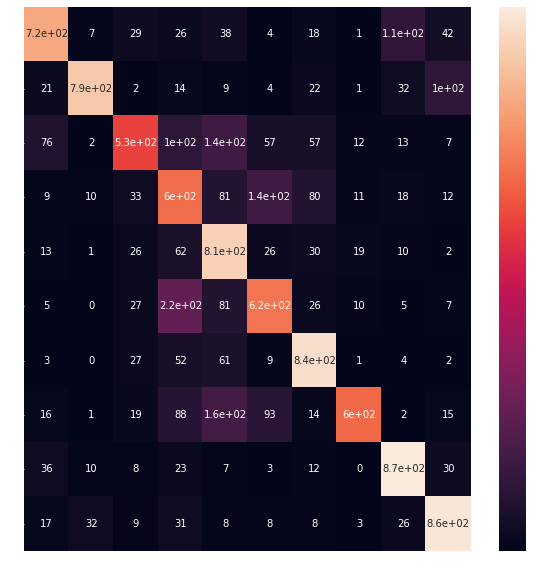

In [ ]:
cf_matrix = confusion_matrix(test_labels, y_pred_classes)
print(cf_matrix)
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cf_matrix, annot=True)

In [ ]:
print("Classification Report:\n", classification_report(test_labels, y_pred_classes ))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.72      0.75      1000
           1       0.93      0.79      0.85      1000
           2       0.75      0.53      0.62      1000
           3       0.49      0.60      0.54      1000
           4       0.58      0.81      0.68      1000
           5       0.64      0.62      0.63      1000
           6       0.76      0.84      0.80      1000
           7       0.91      0.60      0.72      1000
           8       0.80      0.87      0.83      1000
           9       0.80      0.86      0.83      1000

    accuracy                           0.72     10000
   macro avg       0.74      0.72      0.73     10000
weighted avg       0.74      0.72      0.73     10000

